In [100]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim

In [77]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [14]:
train_data_FD001_path = "CMAPPSData/train_FD001.txt"

index_columns_name = ["unit number","time, in cycles"]
operation_settings_columns_names = ["Opset" + str(i) for i in range(1,4)]
sensor_measure_columns_names = ["SensorMeasure" + str(i) for i in range (1,22)]
input_file_columns_names = index_columns_name + operation_settings_columns_names + sensor_measure_columns_names

cols_to_drop = ["Opset3","SensorMeasure1","SensorMeasure5","SensorMeasure6","SensorMeasure10","SensorMeasure14","SensorMeasure16",
                "SensorMeasure18","SensorMeasure19"]

df_train = pd.read_csv(train_data_FD001_path,delim_whitespace=True,names=input_file_columns_names)
df_train = df_train.drop(cols_to_drop,axis=1)

df_train


C:\Users\nguye\AppData\Local\Temp\ipykernel_19248\3981114162.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_train = pd.read_csv(train_data_FD001_path,delim_whitespace=True,names=input_file_columns_names)


,unit number,"time, in cycles",Opset1,Opset2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640


In [106]:
test_data_FD001_path = "CMAPPSData/test_FD001.txt"
df_test = pd.read_csv(test_data_FD001_path,delim_whitespace=True,names=input_file_columns_names)
df_test = df_test.drop(cols_to_drop,axis=1)

df_test

C:\Users\nguye\AppData\Local\Temp\ipykernel_19248\171900061.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test = pd.read_csv(test_data_FD001_path,delim_whitespace=True,names=input_file_columns_names)


,unit number,"time, in cycles",Opset1,Opset2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699


In [112]:
test_data_FD001_RUL_path = "CMAPPSData/RUL_FD001.txt"

df_test_label = pd.read_csv(test_data_FD001_RUL_path,delim_whitespace=True,names=["RUL"])
df_test_label

C:\Users\nguye\AppData\Local\Temp\ipykernel_19248\2011162059.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_test_label = pd.read_csv(test_data_FD001_RUL_path,delim_whitespace=True,names=["RUL"])


,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [45]:
print("Finding the max cycle for each unit number")
rul = df_train.groupby("unit number")["time, in cycles"].max().reset_index()
rul.columns = ["unit number","max"]

df_train = df_train.merge(rul,on="unit number")
df_train["RUL"] = df_train["max"] - df_train["time, in cycles"]
df_train.head(3)

Finding the max cycle for each unit number


,unit number,"time, in cycles",Opset1,Opset2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,max,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,192,189


In [74]:
def gen_train(id_df,seq_length,seq_columns):
    """
        Function to prepare train data into (samples, time steps, features)
        id_df = train dataframe
        seq_lengths = look back period 
        seq_cols = feature columns 
    """
    data_array = id_df[seq_columns].values
    num_elements = data_array.shape[0]
    ltsm_array = []

    for start,stop in zip(range(0,num_elements-seq_length+1), range(seq_length,num_elements+1)):
        ltsm_array.append(data_array[start:stop,:])
    
    return ltsm_array

def gen_targets(id_df,seq_length,seq_columns): 
    data_array = id_df[seq_columns].values 
    num_elements = data_array.shape[0]
    return data_array[seq_length-1:num_elements+1]

dummy_data = df_train
X_columns = [column for column in df_train.columns if column != "RUL"]
min_max_scaler = MinMaxScaler(feature_range=(-1,1)) 
dummy_data[X_columns] = min_max_scaler.fit_transform(df_train[X_columns])

sequence_length = 10 
X_train = np.concatenate((list(list(gen_train(df_train[df_train["unit number"] == unit],sequence_length,X_columns)) for unit in df_train["unit number"].unique())))
print("X_train: ",X_train.shape)
y_train = np.concatenate((list(list(gen_targets(df_train[df_train["unit number"] == unit],sequence_length,"RUL")) for unit in df_train["unit number"].unique())))
print("y_train: ",y_train.shape)

X_train:  (19731, 10, 18)
y_train:  (19731,)


In [89]:
class TurboFanDataset(Dataset):
    def __init__(self,features,labels):
        super().__init__()
        self.features = features
        self.labels = labels 

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx],self.labels[idx]
    
train_dataset = TurboFanDataset(X_train,y_train)

In [90]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)

In [96]:
nb_features = X_train.shape[2]
nb_out =  1

class RULPrediticeModel(nn.Module): 
    def __init__(self,input_size):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=128, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(num_features=128)  # BatchNorm for LSTM output
        self.dropout1 = nn.Dropout(0.2)

        self.lstm = nn.LSTM(input_size=128,hidden_size=56,batch_first=True)

        self.net = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features=56,out_features=1),
            nn.ReLU(),
        )

    def forward(self,x,targets = None): 
        x, _ = self.lstm1(x)  # x: (batch_size, seq_len, 128)
        x = x.transpose(1, 2)  # Transpose for BatchNorm1d (batch_size, 128, seq_len)
        x = self.batch_norm(x)
        x = x.transpose(1, 2)  # Back to (batch_size, seq_len, 128)
        x = self.dropout1(x)

        x, (h_n, c_n) = self.lstm(x)  # h_n: (num_layers, batch_size, hidden_size)
        x = h_n[-1] #Extract the hidden state of the last layer and time step 
        out = self.net(x)
        if targets is None:
            loss = None 
        else: 
            loss = F.mse_loss(out.view(-1),targets)
        
        return out,loss


model = RULPrediticeModel(input_size=nb_features)
batch = next(iter(train_loader))
x_batch, y_batch = batch
print(f"x_batch shape: {x_batch.shape}")  # Should be (16, 10, 18)
print(f"y_batch shape: {y_batch.shape}")
logits,loss = model(x_batch.to(torch.float32),y_batch.to(torch.float32))
print(f"logits shape: {logits.shape}")
print(f"loss: {loss}")

x_batch shape: torch.Size([32, 10, 18])
y_batch shape: torch.Size([32])
logits shape: torch.Size([32, 1])
loss: 13017.783203125


In [121]:
model = model.to(device)
model

RULPrediticeModel(
  (lstm1): LSTM(18, 128, batch_first=True)
  (batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(128, 56, batch_first=True)
  (net): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=56, out_features=1, bias=True)
    (2): ReLU()
  )
)

In [122]:
optimizer = optim.RMSprop(model.parameters(),lr=1e-5)

In [123]:
def train(model,loader,optimizer): 
    model.train() 
    running_loss = 0
    for X_batch, y_batch in loader: 
        X_batch,y_batch = X_batch.to(device),y_batch.to(device)
        logits,loss = model(X_batch.to(torch.float32),y_batch.to(torch.float32))
        optimizer.zero_grad(set_to_none=True)
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
    return running_loss/len(loader)

In [127]:
train_losses = []
for epoch in range(100): 
    train_loss = train(model,train_loader,optimizer)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}")

    train_losses.append(train_loss)

Epoch 1, Train Loss: 1008.7321
Epoch 2, Train Loss: 1004.2252
Epoch 3, Train Loss: 988.4273
Epoch 4, Train Loss: 985.7352
Epoch 5, Train Loss: 982.3631
Epoch 6, Train Loss: 976.3589
Epoch 7, Train Loss: 968.6072
Epoch 8, Train Loss: 963.9444
Epoch 9, Train Loss: 950.0445
Epoch 10, Train Loss: 941.8679
Epoch 11, Train Loss: 938.6036
Epoch 12, Train Loss: 924.9515
Epoch 13, Train Loss: 921.3021
Epoch 14, Train Loss: 917.5225
Epoch 15, Train Loss: 904.1239
Epoch 16, Train Loss: 905.9688
Epoch 17, Train Loss: 906.3739
Epoch 18, Train Loss: 890.4101
Epoch 19, Train Loss: 879.9998
Epoch 20, Train Loss: 874.7652
Epoch 21, Train Loss: 867.8201
Epoch 22, Train Loss: 863.9067
Epoch 23, Train Loss: 854.4260
Epoch 24, Train Loss: 858.8698
Epoch 25, Train Loss: 842.6345
Epoch 26, Train Loss: 847.7928
Epoch 27, Train Loss: 834.2549
Epoch 28, Train Loss: 824.1020
Epoch 29, Train Loss: 819.1398
Epoch 30, Train Loss: 812.9362
Epoch 31, Train Loss: 808.8923
Epoch 32, Train Loss: 806.8180
Epoch 33, Train

In [128]:
torch.save(model.state_dict(), "RUL_Turbofan_model")

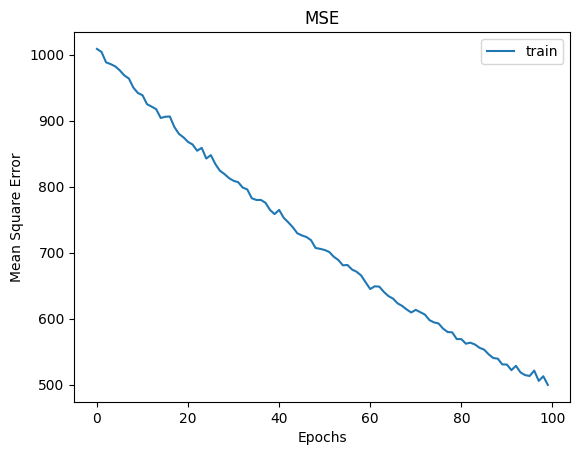

In [129]:
plt.plot(train_losses)
plt.title("MSE")
plt.ylabel("Mean Square Error")
plt.xlabel("Epochs")
plt.legend(['train'],loc="upper right")
plt.show()

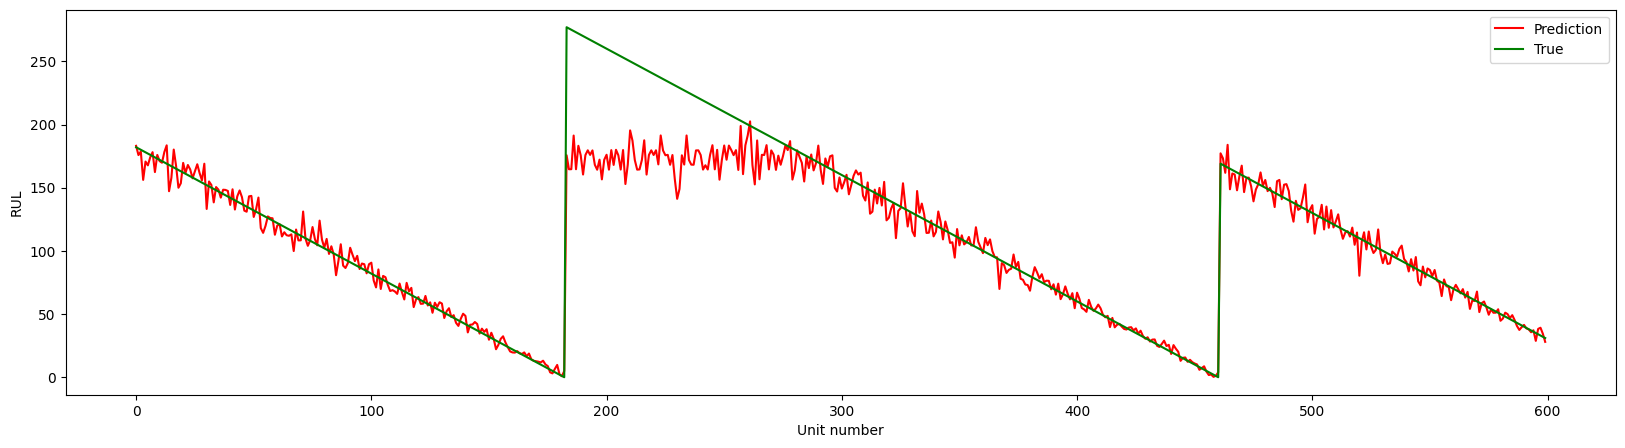

In [141]:
X_train_gpu = torch.tensor(X_train,dtype=torch.float32).to(device)
y_train_gpu = torch.tensor(y_train,dtype=torch.float32).to(device)

y_pred_test = model(X_train_gpu[:600])[0]
y_pred_test_cpu = y_pred_test.detach().cpu().numpy()
plt.figure(figsize=(20,5))
plt.plot(y_pred_test_cpu,color="red",label="Prediction")
plt.plot(y_train[:600],color="green",label="True")
plt.xlabel("Unit number")
plt.ylabel("RUL")
plt.legend(loc="upper right")
plt.show()